In [52]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

## Modélisation physique du pendule double

In [53]:
"""Symbols"""
theta1, theta2, theta1_dot, theta2_dot, theta1_ddot, theta2_ddot = sp.symbols('theta1 theta2 theta1_dot theta2_dot, theta1_ddot, theta2_ddot')

"""Parameters"""
m1, m2, l1, l2 = 1, 1, 1, 1
g = 9.81
y0 = np.array([np.pi/2, np.pi/2, 0, 0])
T = 2.0
N = 1000
h = T/N

"""Equations"""
eq1 = (m1 + m2) * l1 * theta1_ddot + m2 * l2 * theta2_ddot * sp.cos(theta1 - theta2) + m2 * l2 * theta2_dot**2 * sp.sin(theta1 - theta2) + (m1 + m2) * 9.81 * sp.sin(theta1)
eq2 = l1 * theta1_ddot * sp.cos(theta1 - theta2) + l2 * theta2_ddot - l1 * theta1_dot**2 * sp.sin(theta1 - theta2) + 9.81 * sp.sin(theta2)


"""Resolution of the system"""
sys = sp.solve((eq1,eq2),(theta1_ddot,theta2_ddot), dict = True)[0]
theta1_ddot_ = sp.simplify(sys[theta1_ddot])
theta2_ddot_ = sp.simplify(sys[theta2_ddot])

"""Substitution"""
theta1_ddot_lambdify = sp.lambdify((theta1, theta1_dot, theta2, theta2_dot), theta1_ddot_, 'numpy')
theta2_ddot_lambdify = sp.lambdify((theta1, theta1_dot, theta2, theta2_dot), theta2_ddot_, 'numpy')

In [54]:
def F(t, y):
    return np.array([y[2], y[3], theta1_ddot_lambdify(y[0], y[1], y[2], y[3]), theta2_ddot_lambdify(y[0], y[1], y[2], y[3])])

## Verlet method de PH

In [55]:
def verlet(Y0, h, l1, l2, m1, m2, N = 1000, g = 9.81):
    """
    Y0: initial conditions
    h: temporal path
    l1: length of the first pendulum
    l2: length of the second pendulum
    m1: mass of the first pendulum
    m2: mass of the second pendulum
    N: number of time steps
    g: gravitational acceleration
    """
    # Initialize an array to store the state vectors at each time step
    Y = np.zeros((N+1, 4))
    # Set the initial condition
    Y[0, :] = Y0
    # Compute the derivative vector at the initial state using function F
    # Initial derivative
    F_Y = F(0, Y0)
    # First step using Euler to bootstrap Verlet
    Y[1, :] = Y[0, :] + h * F_Y + 0.5 * h**2 * F_Y

    # Iterate over each time step
    for i in range(1, N):
        # Compute the derivative vector at the current state using function F
        y_temp = np.zeros(4)
        y_temp[:2] = 2 * Y[i, :2] - Y[i-1, :2] + (h**2) * F(0,Y[i, :])[2:] # Verlet method
        y_temp[2:] = (y_temp[:2] - Y[i-1, :2]) / (2 * h) 
        # Updating Y[i+1] using intermediate values
        Y[i+1, :2] = y_temp[:2] 
        Y[i+1, 2:] = (Y[i+1, :2] - Y[i, :2]) / h # Derivative

    return Y

In [56]:
Y = verlet(y0, h, l1, l2, m1, m2, N, g)

## 4. Mouvement chaotique et sensibilité par rapport aux conditions initiales

### Question 1

In [57]:
def PhaseSpacePlot(Y):
    plt.figure(figsize=(12, 6))
    
    # Sous-graphique pour le pendule 1
    plt.subplot(1, 2, 1)
    plt.plot(Y[:, 0], Y[:, 2])
    plt.xlabel(r"$\theta_1$")
    plt.ylabel(r"$\theta_1 '$")
    plt.title(r"Phase space plot for $\theta_1$")
    
    # Sous-graphique pour le pendule 2
    plt.subplot(1, 2, 2)
    plt.plot(Y[:, 1], Y[:, 3])
    plt.xlabel(r"$\theta_2$")
    plt.ylabel(r"$\theta_2 '$")
    plt.title(r"Phase space plot for $\theta_2$")
    
    plt.tight_layout()
    plt.show()

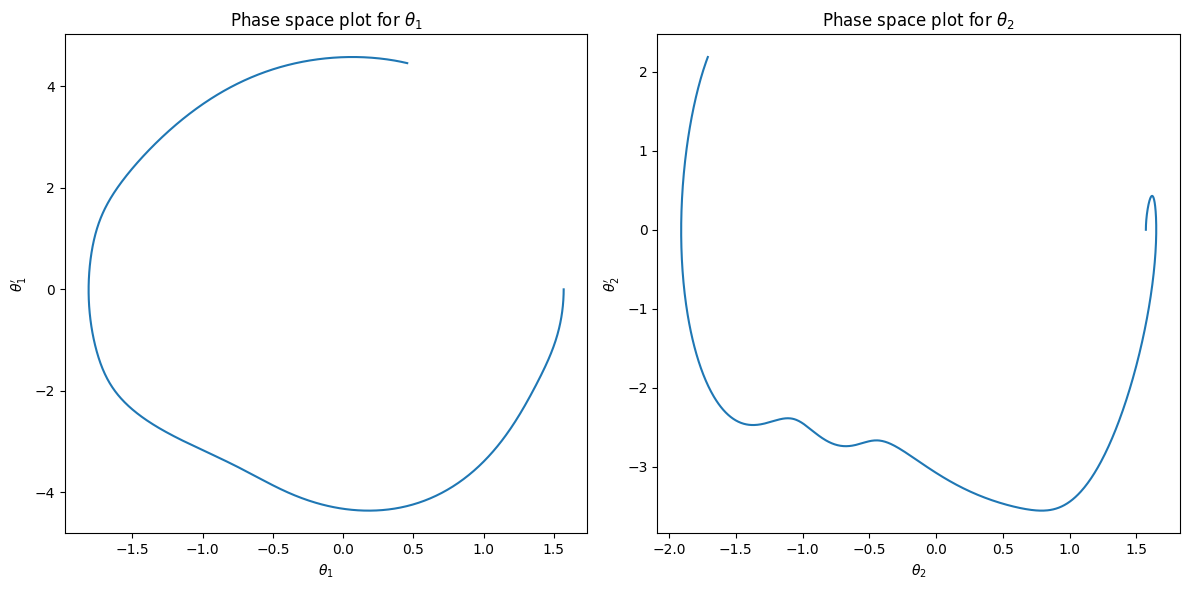

In [58]:
PhaseSpacePlot(Y)

Test for initial condition given by $y_0 = [\pi/2, \pi/2, 0, 0]$

### Question 2

In [59]:
def graph_function_time(Y, t):
    """Plot for theta_1 and theta_1'"""
    plt.figure(figsize=(12, 6))
    # Sous-graphique pour theta_1
    plt.subplot(1, 2, 1)
    plt.plot(t, Y[:, 0])
    plt.xlabel("time")
    plt.ylabel(r"$\theta_1$")
    plt.title(r"$\theta_1$ in function of time")
    
    # Sous-graphique pour theta_1'
    plt.subplot(1, 2, 2)
    plt.plot(t, Y[:, 2])
    plt.xlabel("time")
    plt.ylabel(r"$\theta_1 '$")
    plt.title(r"$\theta_1 '$ in function of time")
    
    plt.tight_layout()
    plt.show()
    
    """Plot for theta_2 and theta_2'"""
    plt.figure(figsize=(12, 6))
    # Sous-graphique pour theta_1
    plt.subplot(1, 2, 1)
    plt.plot(t, Y[:, 1])
    plt.xlabel("time")
    plt.ylabel(r"$\theta_2$")
    plt.title(r"$\theta_2$ in function of time")
    
    # Sous-graphique pour theta_1'
    plt.subplot(1, 2, 2)
    plt.plot(t, Y[:, 3])
    plt.xlabel("time")
    plt.ylabel(r"$\theta_2 '$")
    plt.title(r"$\theta_2 '$ in function of time")
    
    plt.tight_layout()
    plt.show()

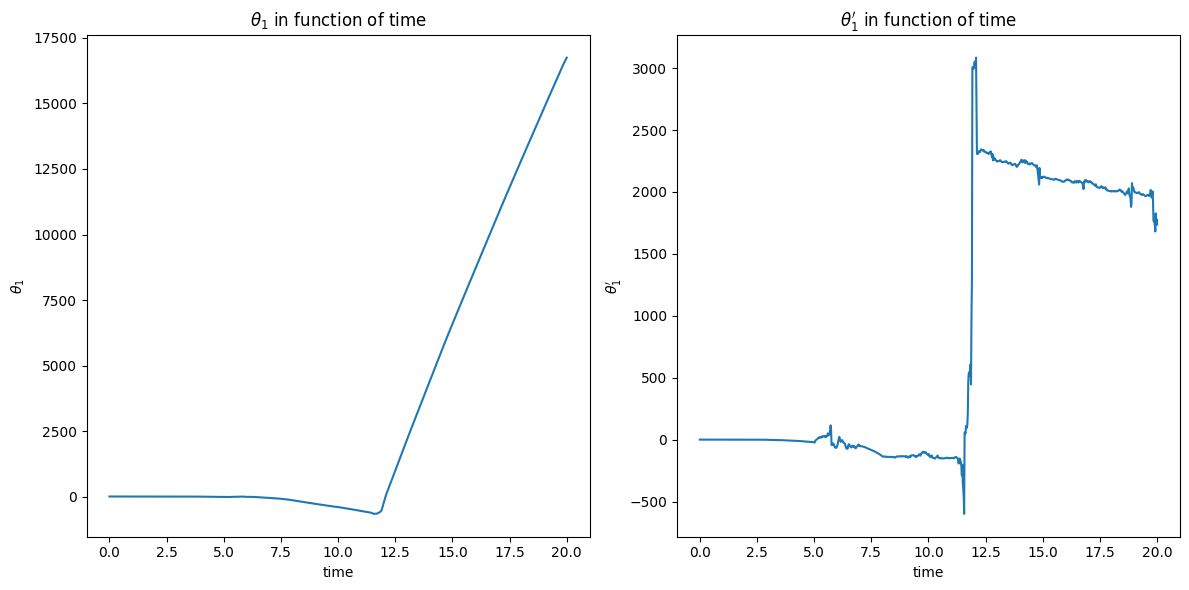

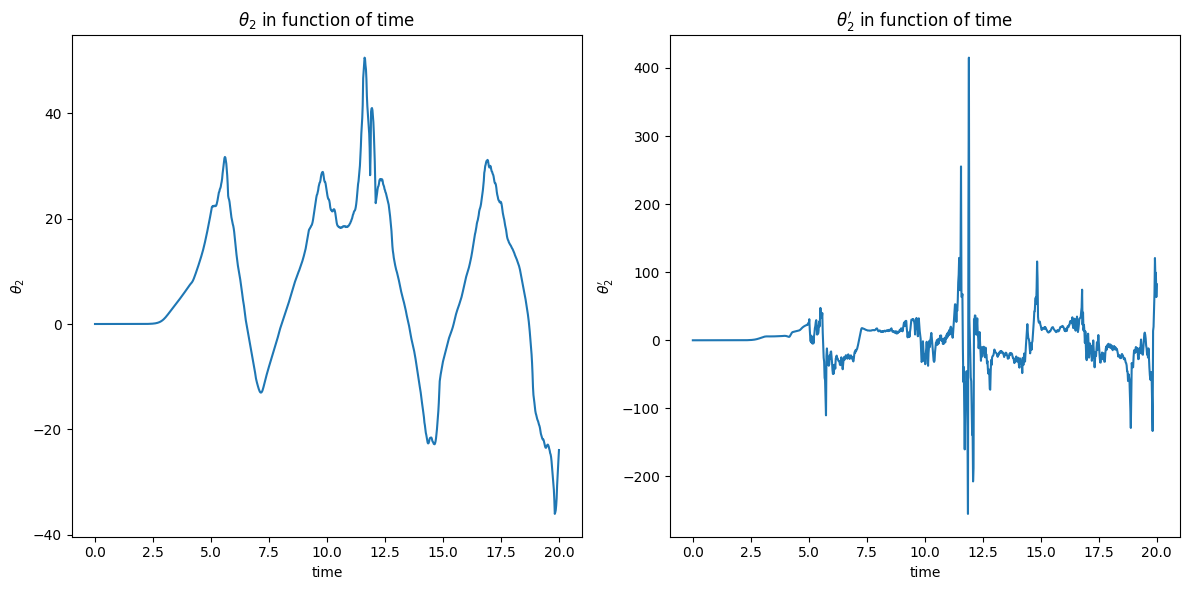

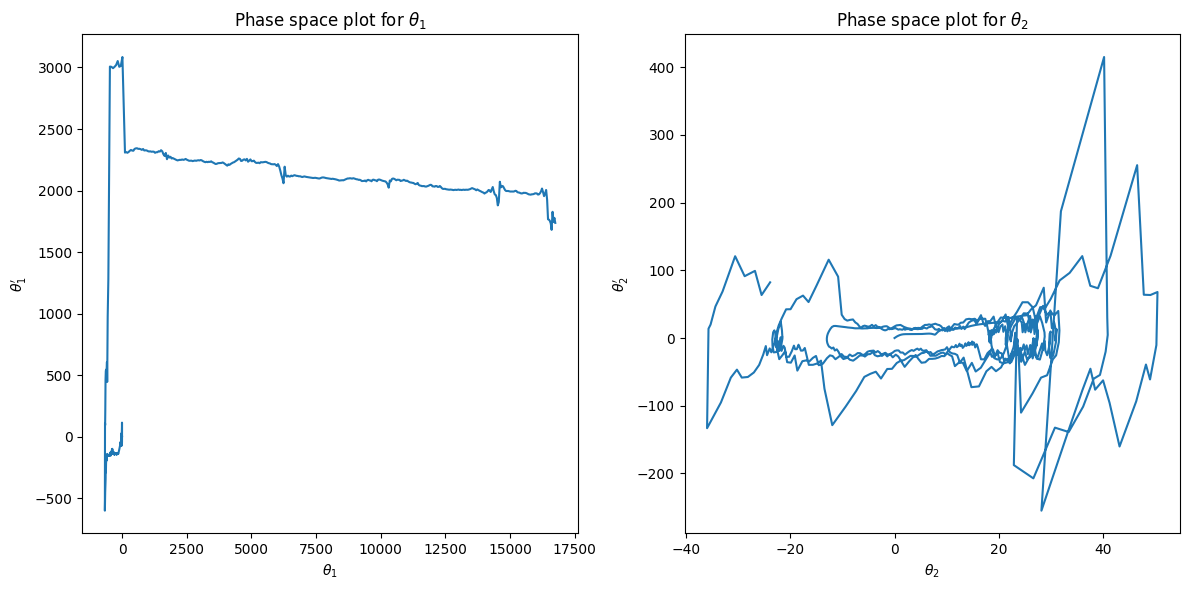

In [60]:
T = 20.0
N = 1000
h = T/N

y0 = np.array([1e-8, np.sqrt(2)* 1e-8, 0, 0])
t = np.linspace(0, T, N+1)

Y = verlet(y0, h, l1, l2, m1, m2, N, g)
graph_function_time(Y, t)
PhaseSpacePlot(Y)

We change the initial condition

<lambdifygenerated-9>:2: RuntimeWarning: overflow encountered in double_scalars
  return (50.0*theta1_dot**2*sin(2*theta1 - 2*theta2) + 100.0*theta2_dot**2*sin(theta1 - theta2) + 1471.5*sin(theta1) + 490.5*sin(theta1 - 2*theta2))/(100.0*cos(theta1 - theta2)**2 - 200.0)
<lambdifygenerated-10>:2: RuntimeWarning: overflow encountered in double_scalars
  return (-100.0*theta1_dot**2*sin(theta1 - theta2) - 25.0*theta2_dot**2*sin(2*theta1 - 2*theta2) + 490.5*sin(theta2) - 490.5*sin(2*theta1 - theta2))/(50.0*cos(theta1 - theta2)**2 - 100.0)
<lambdifygenerated-9>:2: RuntimeWarning: invalid value encountered in double_scalars
  return (50.0*theta1_dot**2*sin(2*theta1 - 2*theta2) + 100.0*theta2_dot**2*sin(theta1 - theta2) + 1471.5*sin(theta1) + 490.5*sin(theta1 - 2*theta2))/(100.0*cos(theta1 - theta2)**2 - 200.0)
<lambdifygenerated-9>:2: RuntimeWarning: invalid value encountered in sin
  return (50.0*theta1_dot**2*sin(2*theta1 - 2*theta2) + 100.0*theta2_dot**2*sin(theta1 - theta2) + 1471.5*sin(t

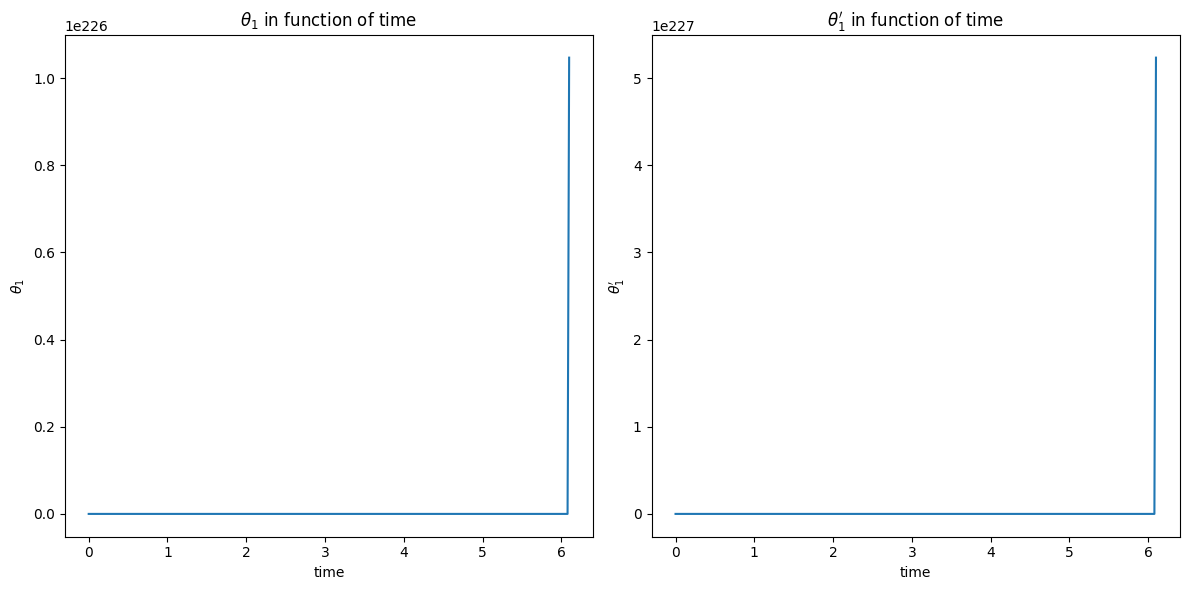

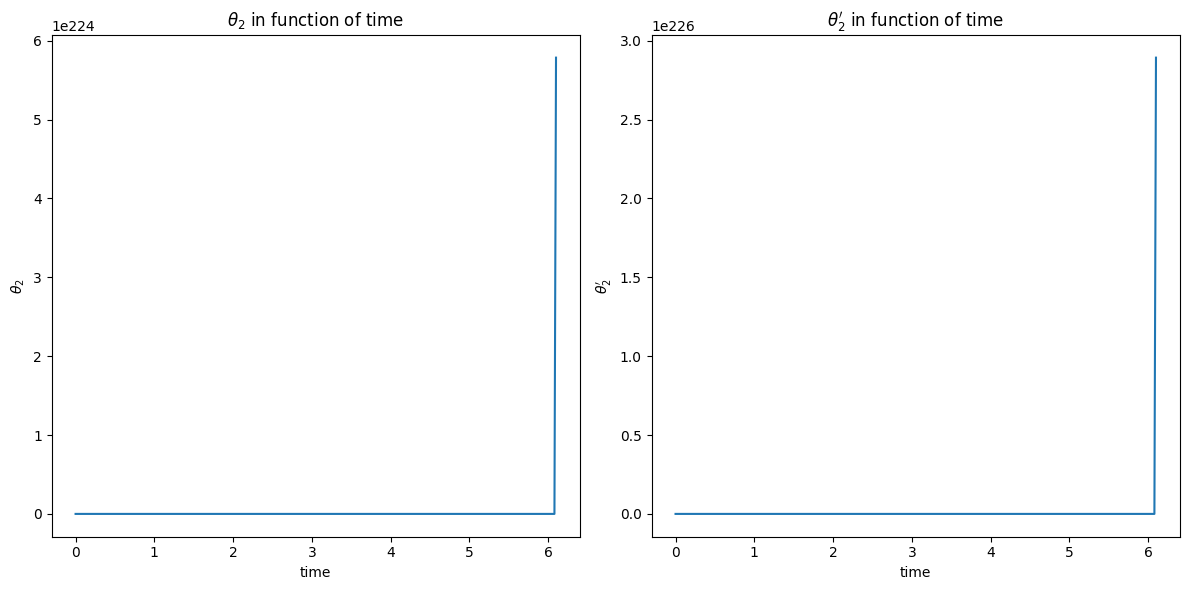

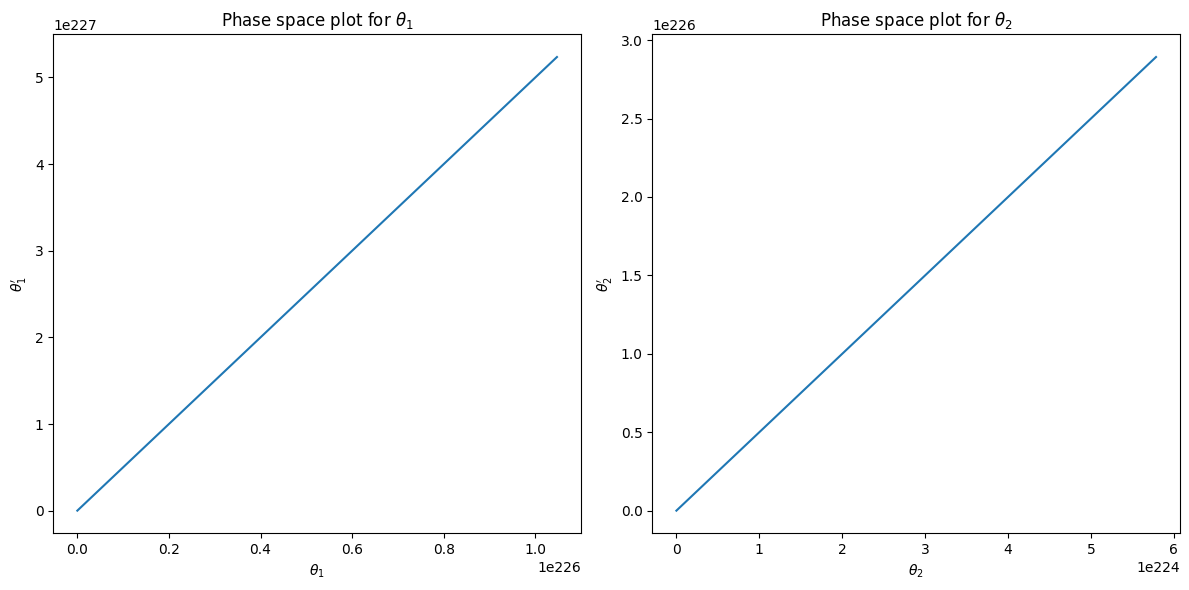

In [61]:
y0 = np.array([1e-8, 1e-8, 0, 0])
Y = verlet(y0, h, l1, l2, m1, m2, N, g)
graph_function_time(Y, t)
PhaseSpacePlot(Y)

As we change the initial condition, the system is very sensitive to the initial condition. The system is chaotic. Therefore in the second case it diverges.

Initial condition:  1e-09


<lambdifygenerated-9>:2: RuntimeWarning: overflow encountered in double_scalars
  return (50.0*theta1_dot**2*sin(2*theta1 - 2*theta2) + 100.0*theta2_dot**2*sin(theta1 - theta2) + 1471.5*sin(theta1) + 490.5*sin(theta1 - 2*theta2))/(100.0*cos(theta1 - theta2)**2 - 200.0)
<lambdifygenerated-9>:2: RuntimeWarning: invalid value encountered in double_scalars
  return (50.0*theta1_dot**2*sin(2*theta1 - 2*theta2) + 100.0*theta2_dot**2*sin(theta1 - theta2) + 1471.5*sin(theta1) + 490.5*sin(theta1 - 2*theta2))/(100.0*cos(theta1 - theta2)**2 - 200.0)
<lambdifygenerated-10>:2: RuntimeWarning: overflow encountered in double_scalars
  return (-100.0*theta1_dot**2*sin(theta1 - theta2) - 25.0*theta2_dot**2*sin(2*theta1 - 2*theta2) + 490.5*sin(theta2) - 490.5*sin(2*theta1 - theta2))/(50.0*cos(theta1 - theta2)**2 - 100.0)
<lambdifygenerated-10>:2: RuntimeWarning: invalid value encountered in double_scalars
  return (-100.0*theta1_dot**2*sin(theta1 - theta2) - 25.0*theta2_dot**2*sin(2*theta1 - 2*theta2) +

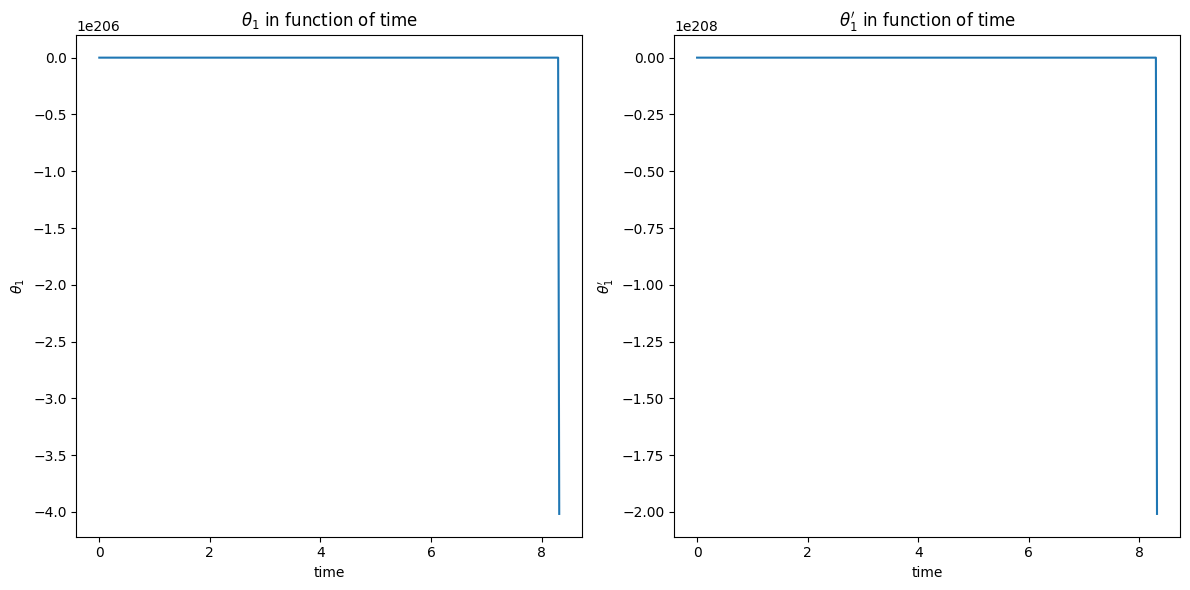

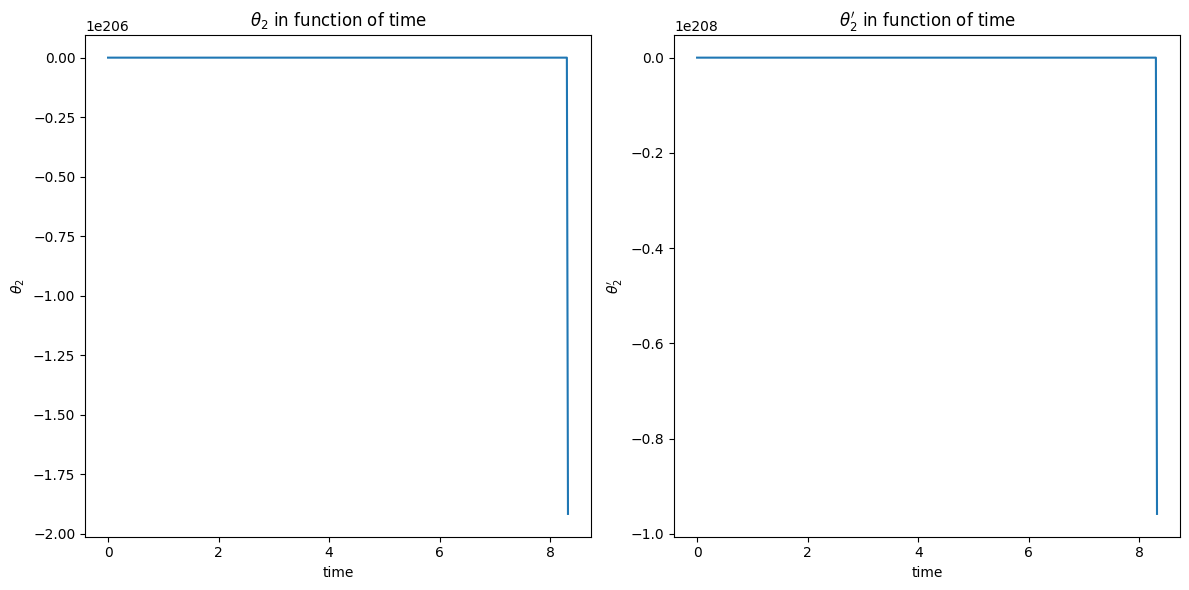

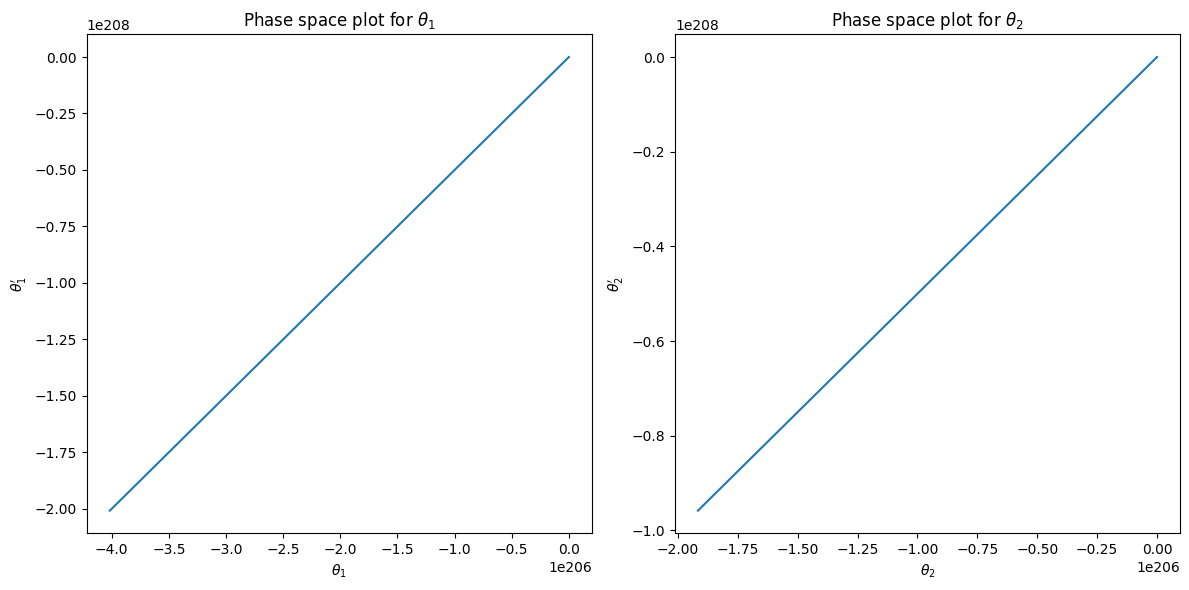

Initial condition:  1e-07


<lambdifygenerated-9>:2: RuntimeWarning: overflow encountered in double_scalars
  return (50.0*theta1_dot**2*sin(2*theta1 - 2*theta2) + 100.0*theta2_dot**2*sin(theta1 - theta2) + 1471.5*sin(theta1) + 490.5*sin(theta1 - 2*theta2))/(100.0*cos(theta1 - theta2)**2 - 200.0)
<lambdifygenerated-9>:2: RuntimeWarning: invalid value encountered in double_scalars
  return (50.0*theta1_dot**2*sin(2*theta1 - 2*theta2) + 100.0*theta2_dot**2*sin(theta1 - theta2) + 1471.5*sin(theta1) + 490.5*sin(theta1 - 2*theta2))/(100.0*cos(theta1 - theta2)**2 - 200.0)
<lambdifygenerated-10>:2: RuntimeWarning: overflow encountered in double_scalars
  return (-100.0*theta1_dot**2*sin(theta1 - theta2) - 25.0*theta2_dot**2*sin(2*theta1 - 2*theta2) + 490.5*sin(theta2) - 490.5*sin(2*theta1 - theta2))/(50.0*cos(theta1 - theta2)**2 - 100.0)
<lambdifygenerated-10>:2: RuntimeWarning: invalid value encountered in double_scalars
  return (-100.0*theta1_dot**2*sin(theta1 - theta2) - 25.0*theta2_dot**2*sin(2*theta1 - 2*theta2) +

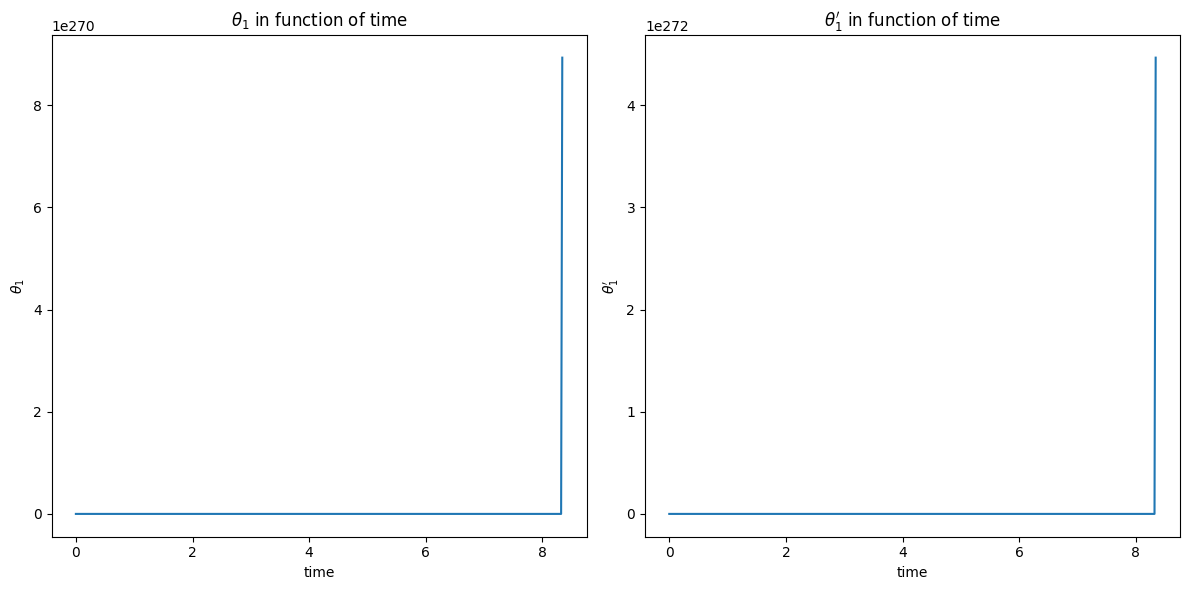

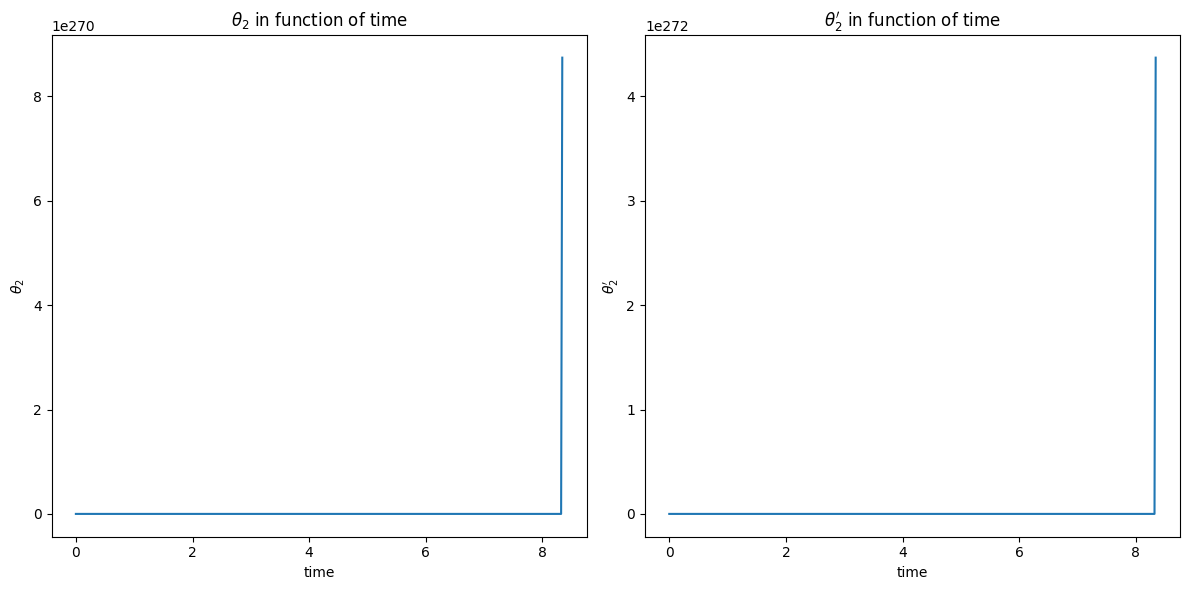

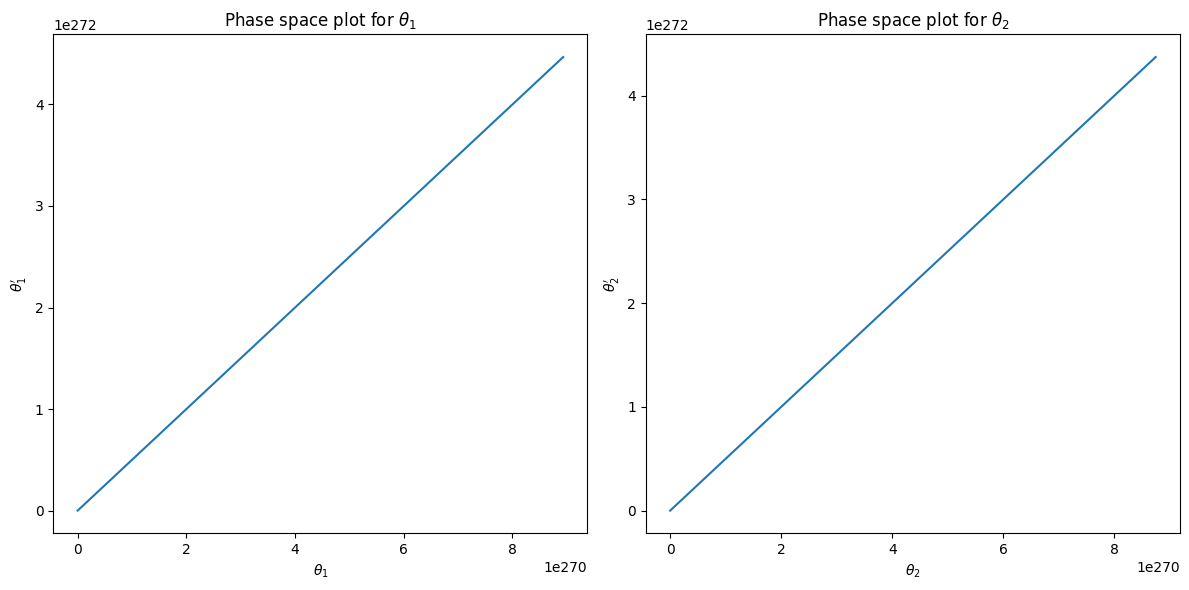

Initial condition:  0.005


<lambdifygenerated-9>:2: RuntimeWarning: overflow encountered in double_scalars
  return (50.0*theta1_dot**2*sin(2*theta1 - 2*theta2) + 100.0*theta2_dot**2*sin(theta1 - theta2) + 1471.5*sin(theta1) + 490.5*sin(theta1 - 2*theta2))/(100.0*cos(theta1 - theta2)**2 - 200.0)
<lambdifygenerated-9>:2: RuntimeWarning: invalid value encountered in double_scalars
  return (50.0*theta1_dot**2*sin(2*theta1 - 2*theta2) + 100.0*theta2_dot**2*sin(theta1 - theta2) + 1471.5*sin(theta1) + 490.5*sin(theta1 - 2*theta2))/(100.0*cos(theta1 - theta2)**2 - 200.0)
<lambdifygenerated-10>:2: RuntimeWarning: overflow encountered in double_scalars
  return (-100.0*theta1_dot**2*sin(theta1 - theta2) - 25.0*theta2_dot**2*sin(2*theta1 - 2*theta2) + 490.5*sin(theta2) - 490.5*sin(2*theta1 - theta2))/(50.0*cos(theta1 - theta2)**2 - 100.0)
<lambdifygenerated-10>:2: RuntimeWarning: invalid value encountered in double_scalars
  return (-100.0*theta1_dot**2*sin(theta1 - theta2) - 25.0*theta2_dot**2*sin(2*theta1 - 2*theta2) +

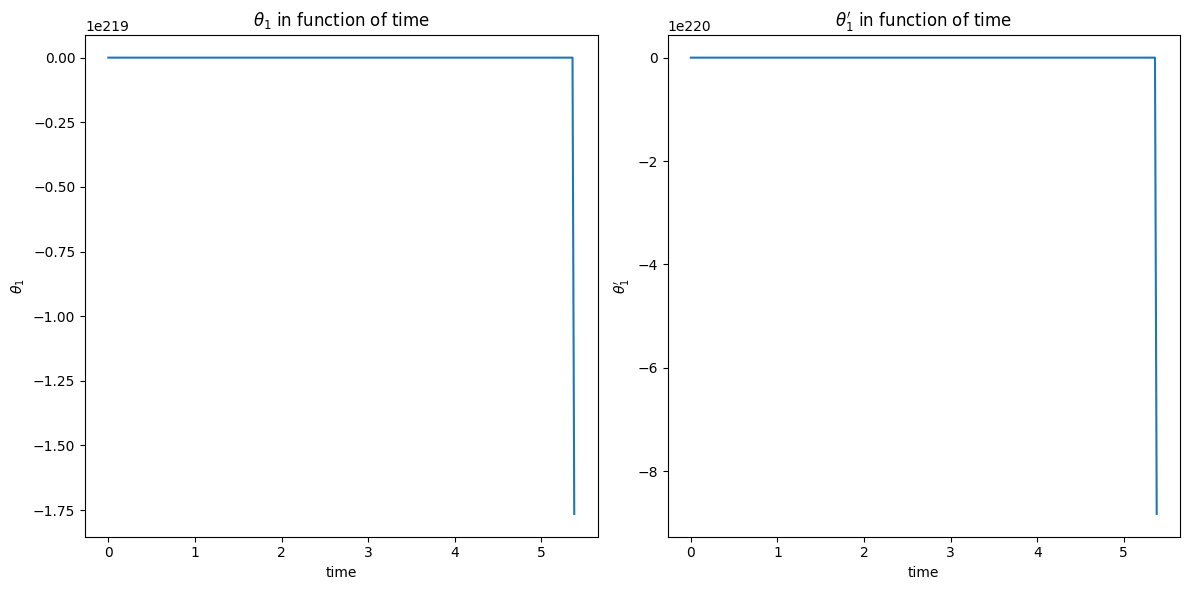

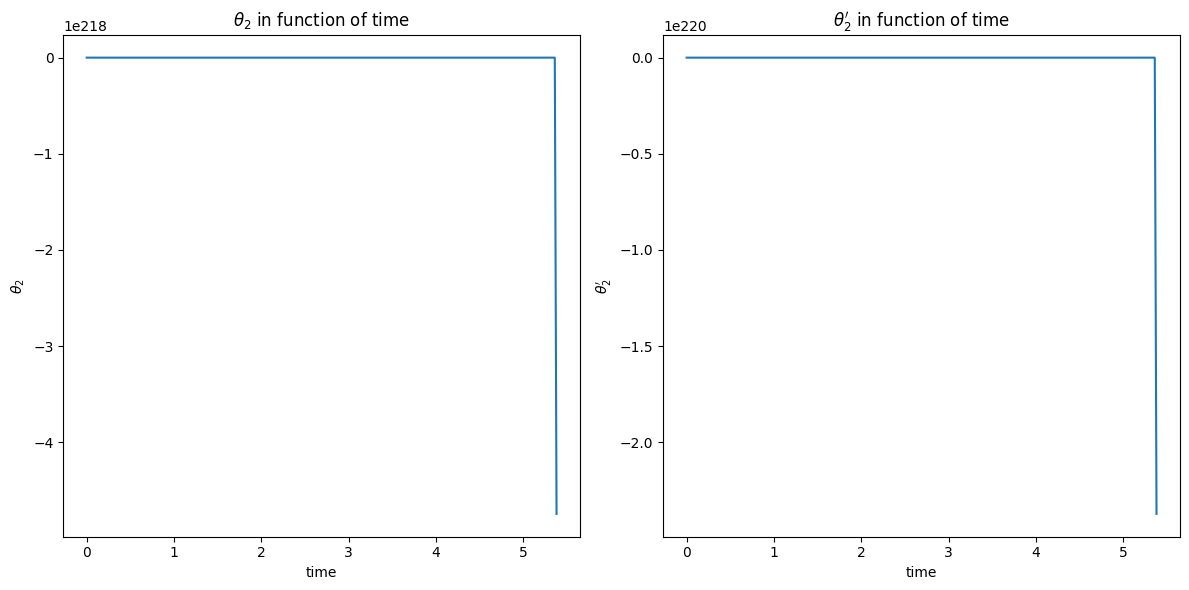

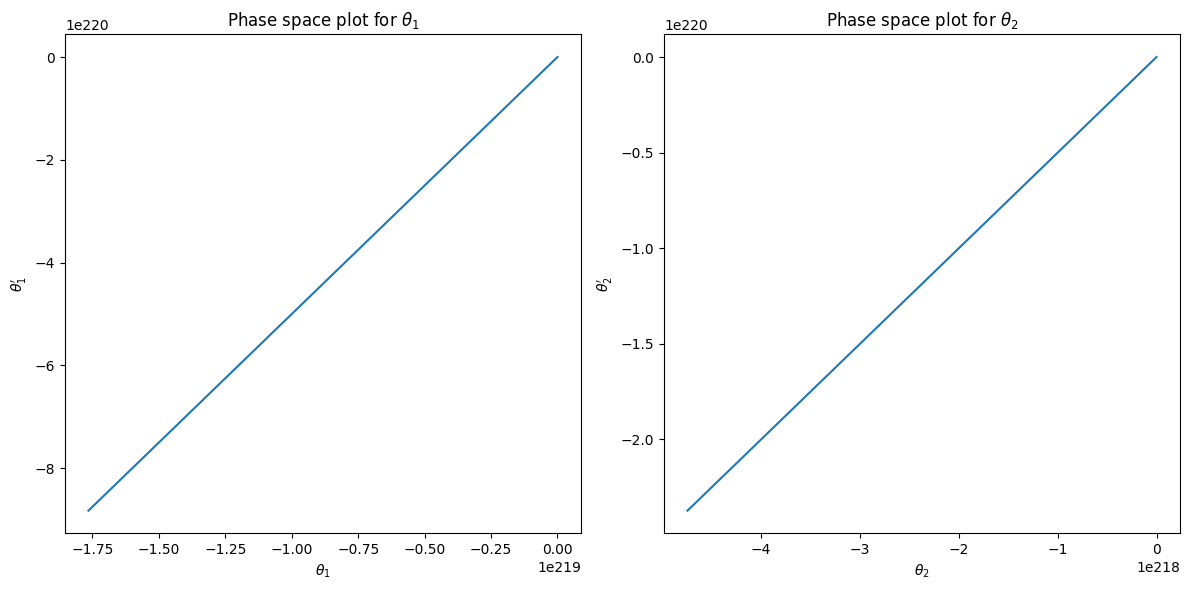

Initial condition:  0.05


<lambdifygenerated-9>:2: RuntimeWarning: overflow encountered in double_scalars
  return (50.0*theta1_dot**2*sin(2*theta1 - 2*theta2) + 100.0*theta2_dot**2*sin(theta1 - theta2) + 1471.5*sin(theta1) + 490.5*sin(theta1 - 2*theta2))/(100.0*cos(theta1 - theta2)**2 - 200.0)
<lambdifygenerated-9>:2: RuntimeWarning: invalid value encountered in double_scalars
  return (50.0*theta1_dot**2*sin(2*theta1 - 2*theta2) + 100.0*theta2_dot**2*sin(theta1 - theta2) + 1471.5*sin(theta1) + 490.5*sin(theta1 - 2*theta2))/(100.0*cos(theta1 - theta2)**2 - 200.0)
<lambdifygenerated-10>:2: RuntimeWarning: overflow encountered in double_scalars
  return (-100.0*theta1_dot**2*sin(theta1 - theta2) - 25.0*theta2_dot**2*sin(2*theta1 - 2*theta2) + 490.5*sin(theta2) - 490.5*sin(2*theta1 - theta2))/(50.0*cos(theta1 - theta2)**2 - 100.0)
<lambdifygenerated-10>:2: RuntimeWarning: invalid value encountered in double_scalars
  return (-100.0*theta1_dot**2*sin(theta1 - theta2) - 25.0*theta2_dot**2*sin(2*theta1 - 2*theta2) +

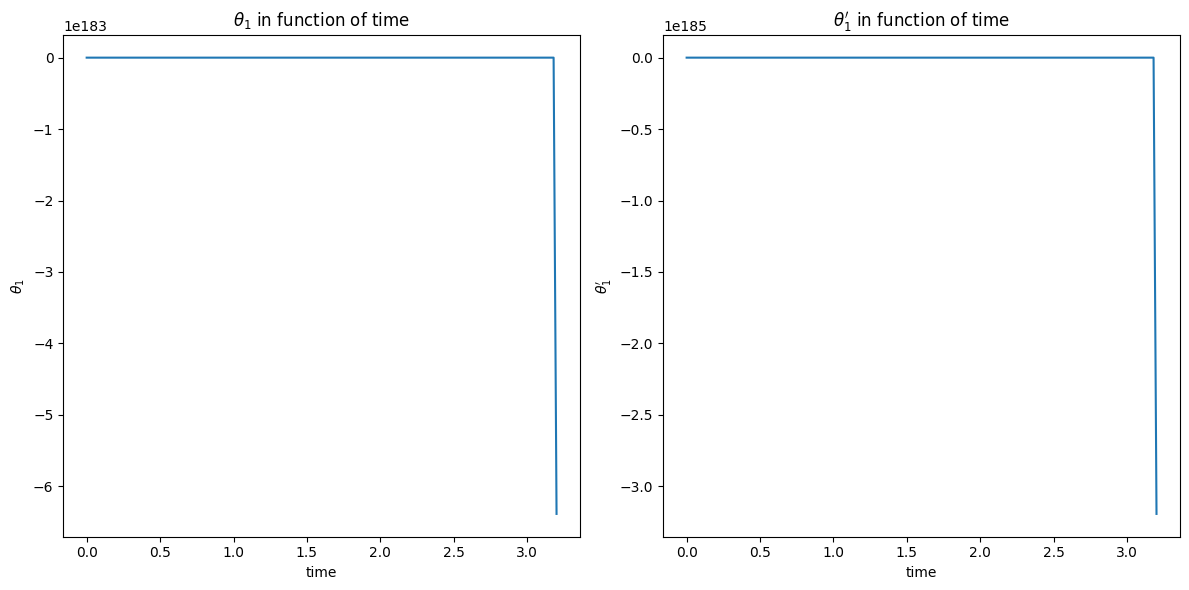

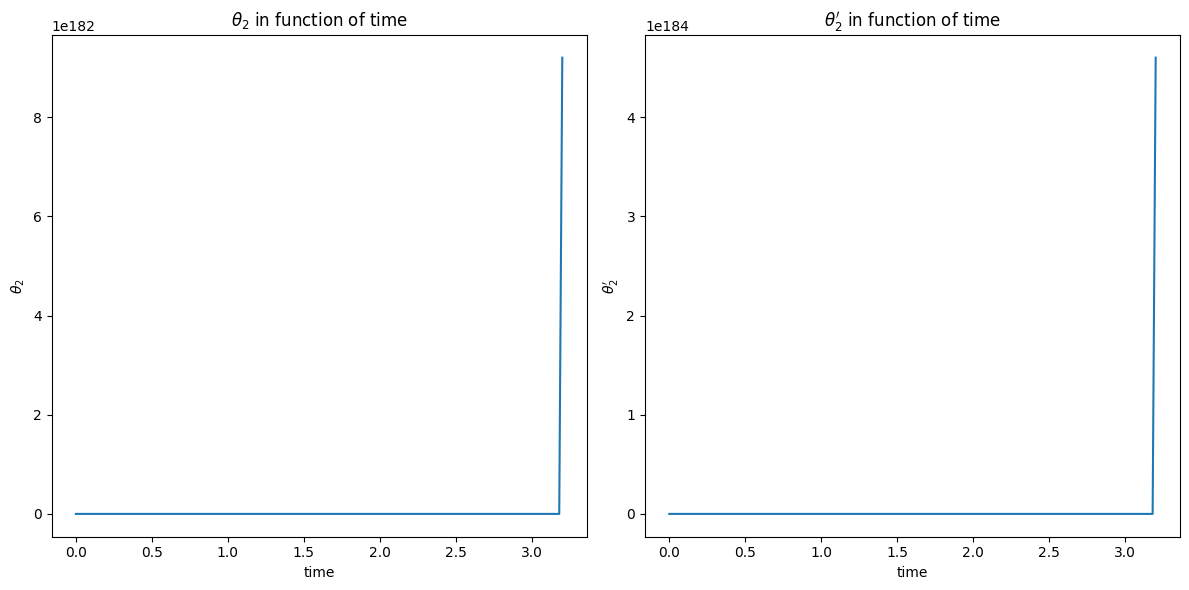

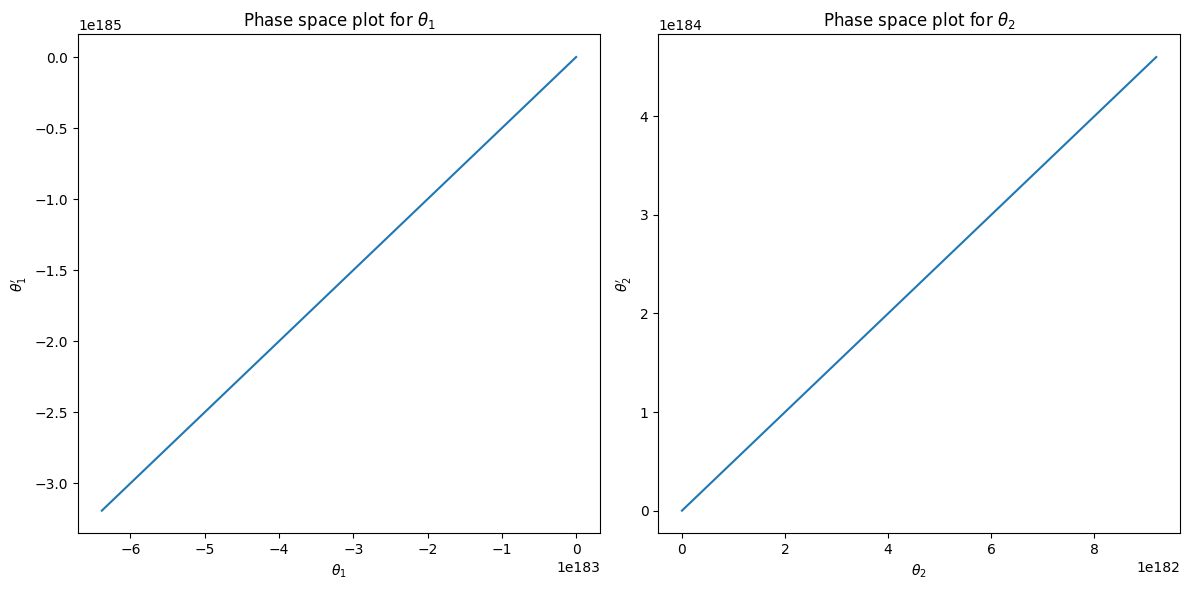

Initial condition:  1


<lambdifygenerated-9>:2: RuntimeWarning: overflow encountered in double_scalars
  return (50.0*theta1_dot**2*sin(2*theta1 - 2*theta2) + 100.0*theta2_dot**2*sin(theta1 - theta2) + 1471.5*sin(theta1) + 490.5*sin(theta1 - 2*theta2))/(100.0*cos(theta1 - theta2)**2 - 200.0)
<lambdifygenerated-10>:2: RuntimeWarning: overflow encountered in double_scalars
  return (-100.0*theta1_dot**2*sin(theta1 - theta2) - 25.0*theta2_dot**2*sin(2*theta1 - 2*theta2) + 490.5*sin(theta2) - 490.5*sin(2*theta1 - theta2))/(50.0*cos(theta1 - theta2)**2 - 100.0)
<lambdifygenerated-9>:2: RuntimeWarning: invalid value encountered in double_scalars
  return (50.0*theta1_dot**2*sin(2*theta1 - 2*theta2) + 100.0*theta2_dot**2*sin(theta1 - theta2) + 1471.5*sin(theta1) + 490.5*sin(theta1 - 2*theta2))/(100.0*cos(theta1 - theta2)**2 - 200.0)
<lambdifygenerated-9>:2: RuntimeWarning: invalid value encountered in sin
  return (50.0*theta1_dot**2*sin(2*theta1 - 2*theta2) + 100.0*theta2_dot**2*sin(theta1 - theta2) + 1471.5*sin(t

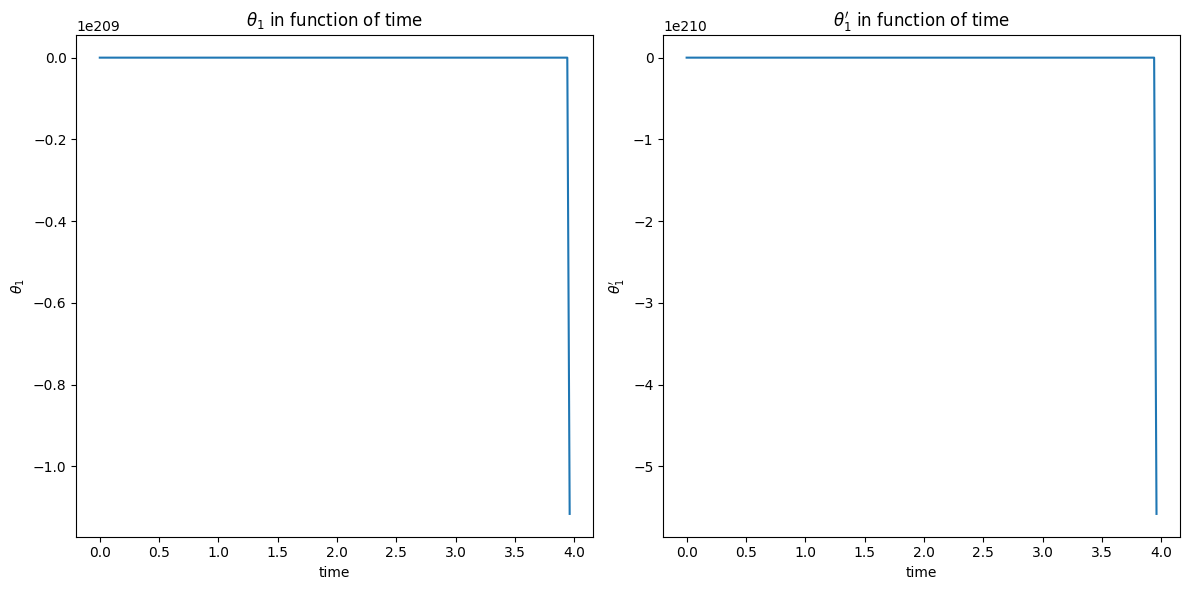

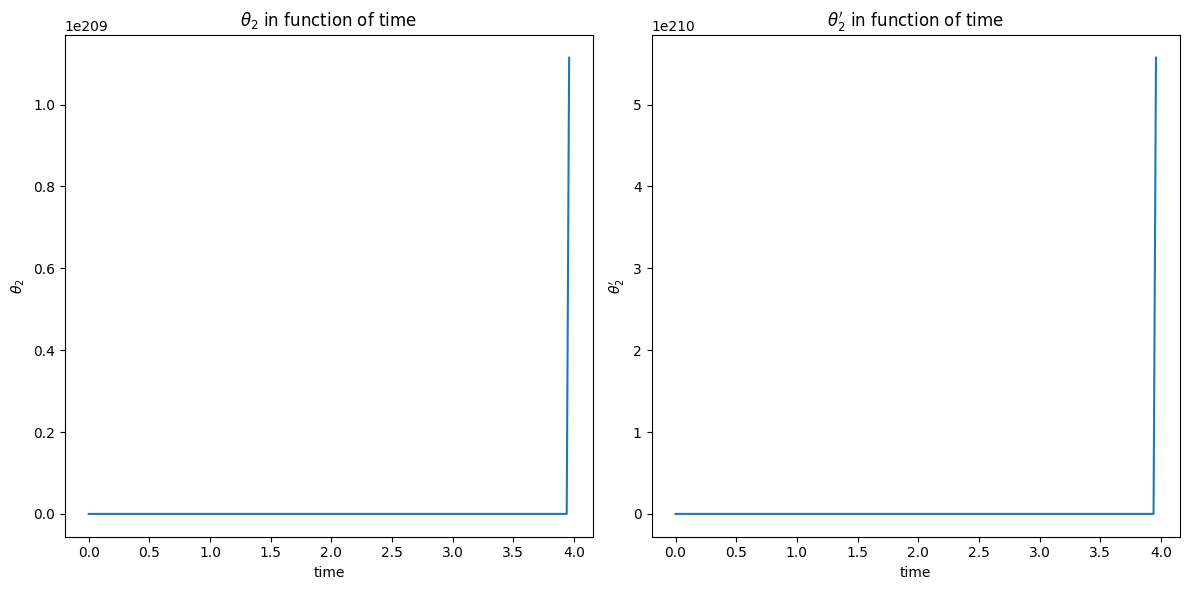

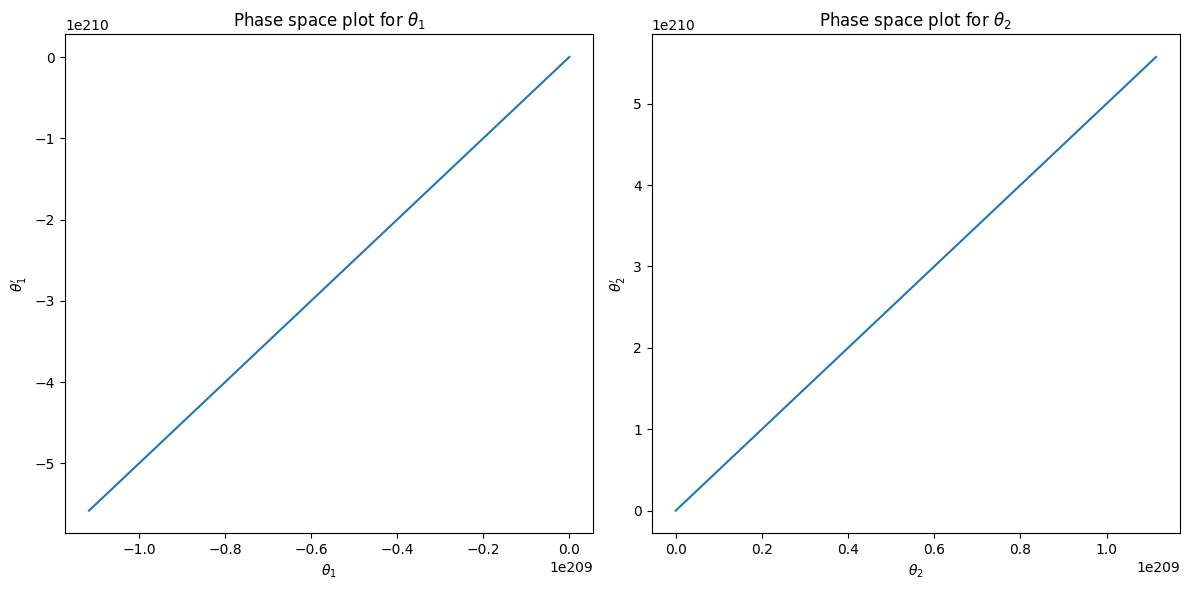

Initial condition:  1.2


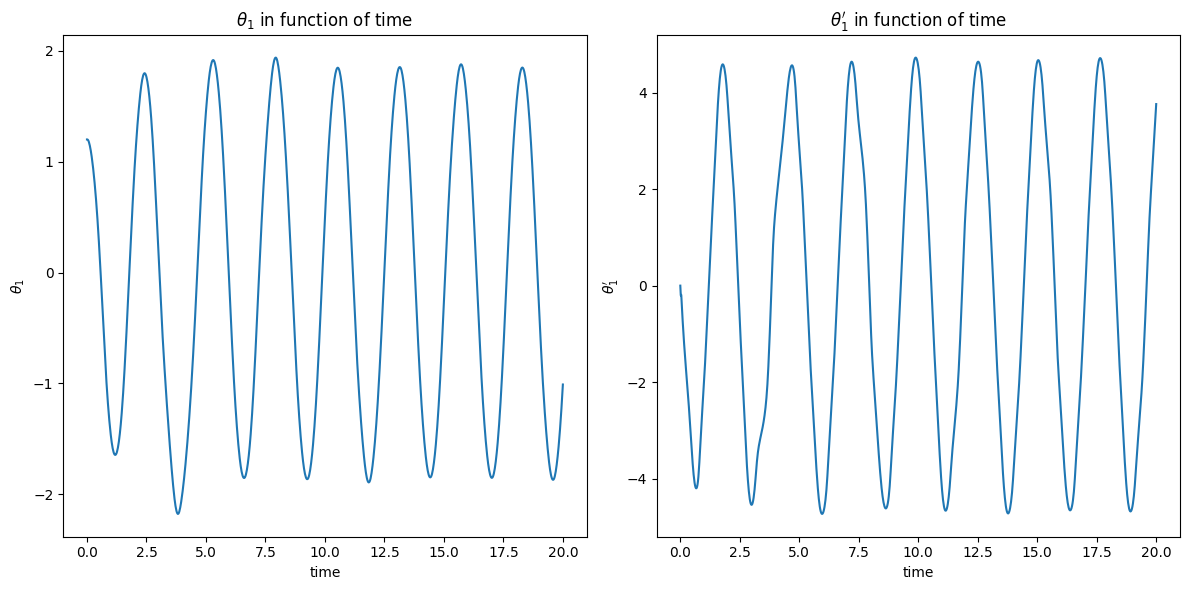

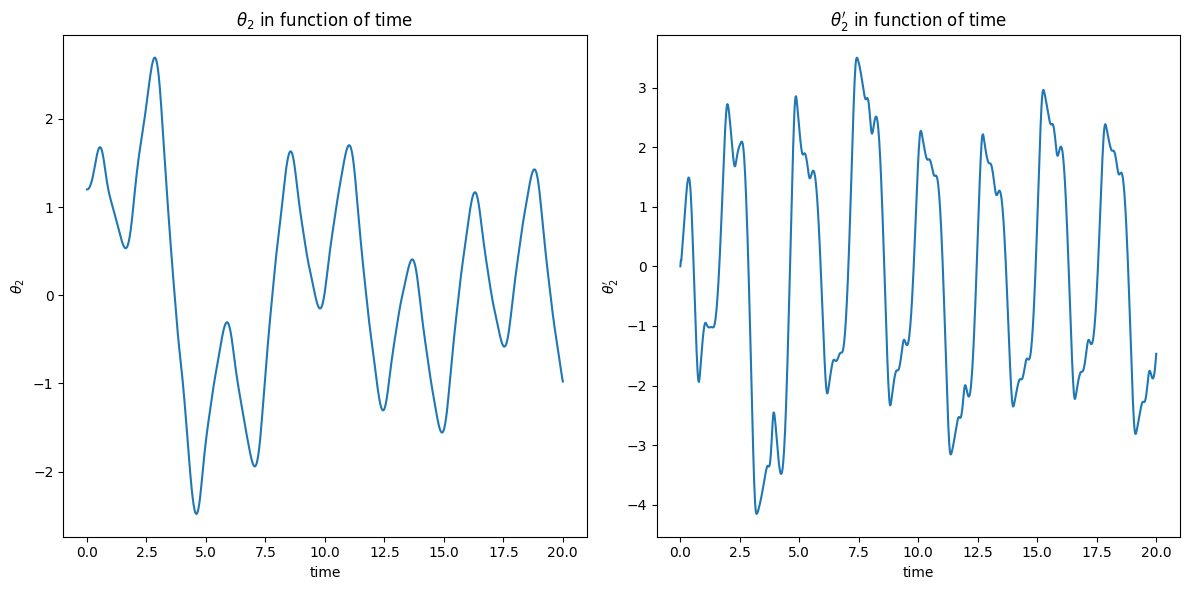

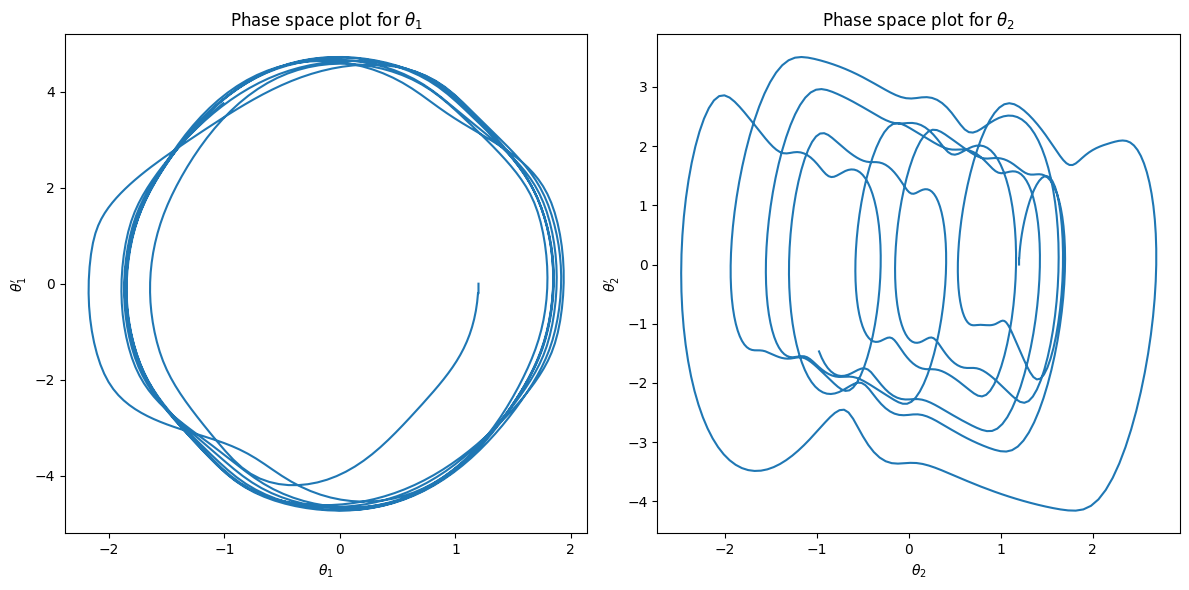

Initial condition:  1.5


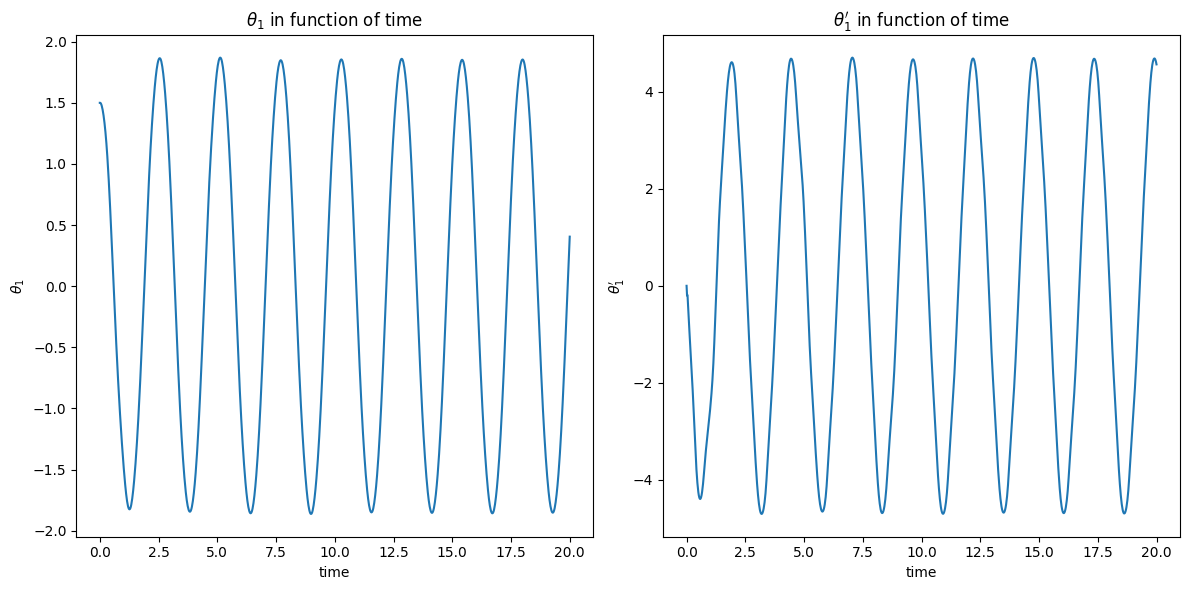

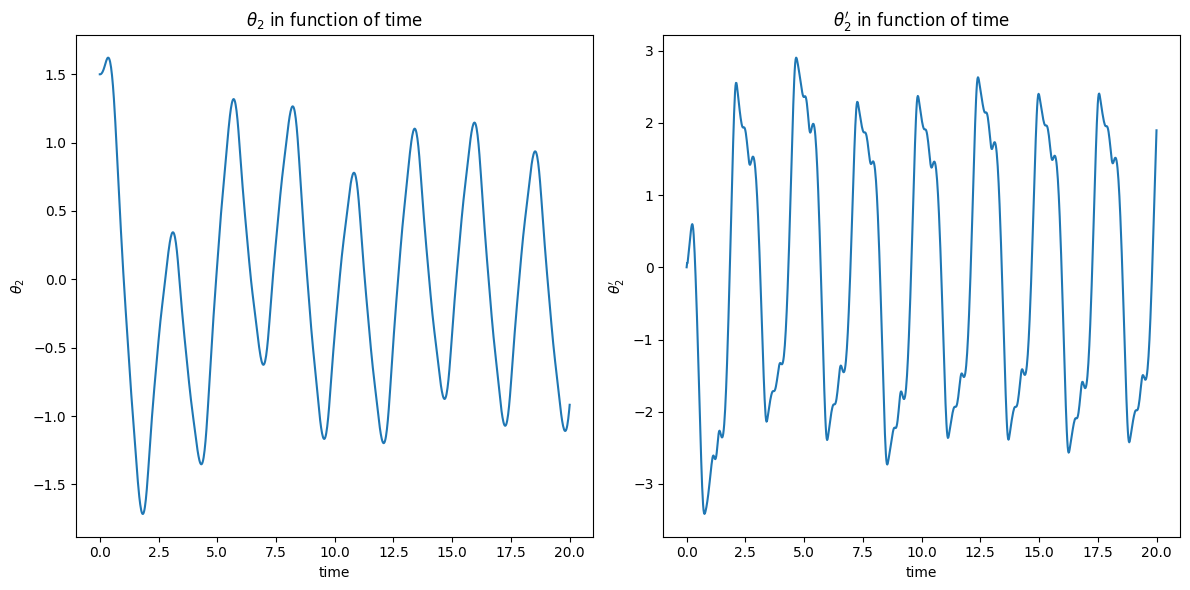

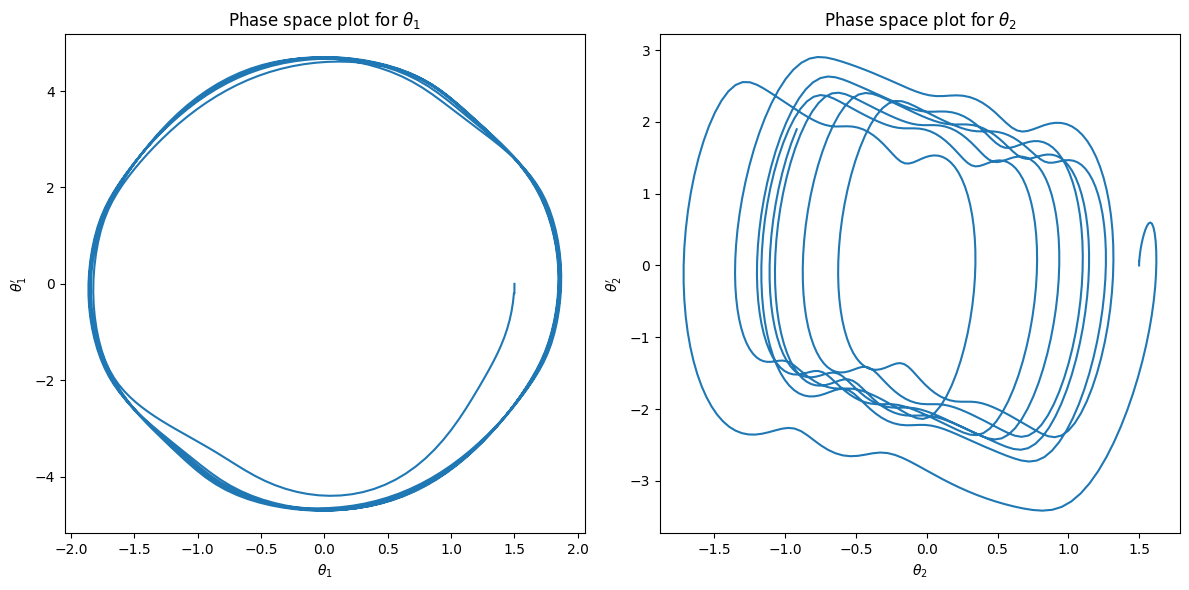

Initial condition:  1.7


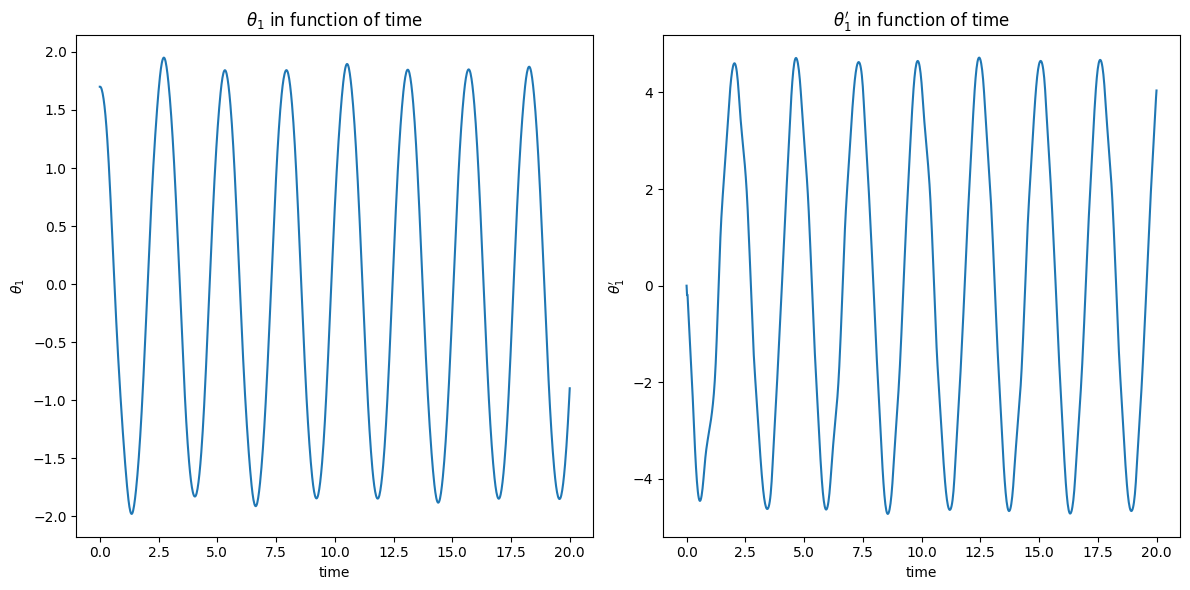

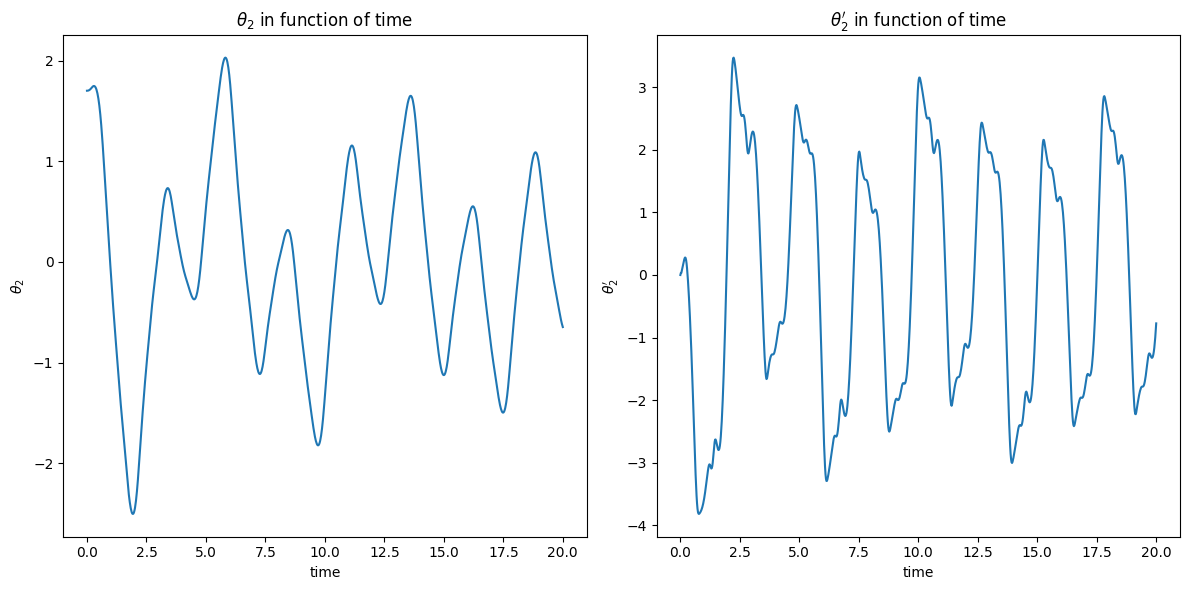

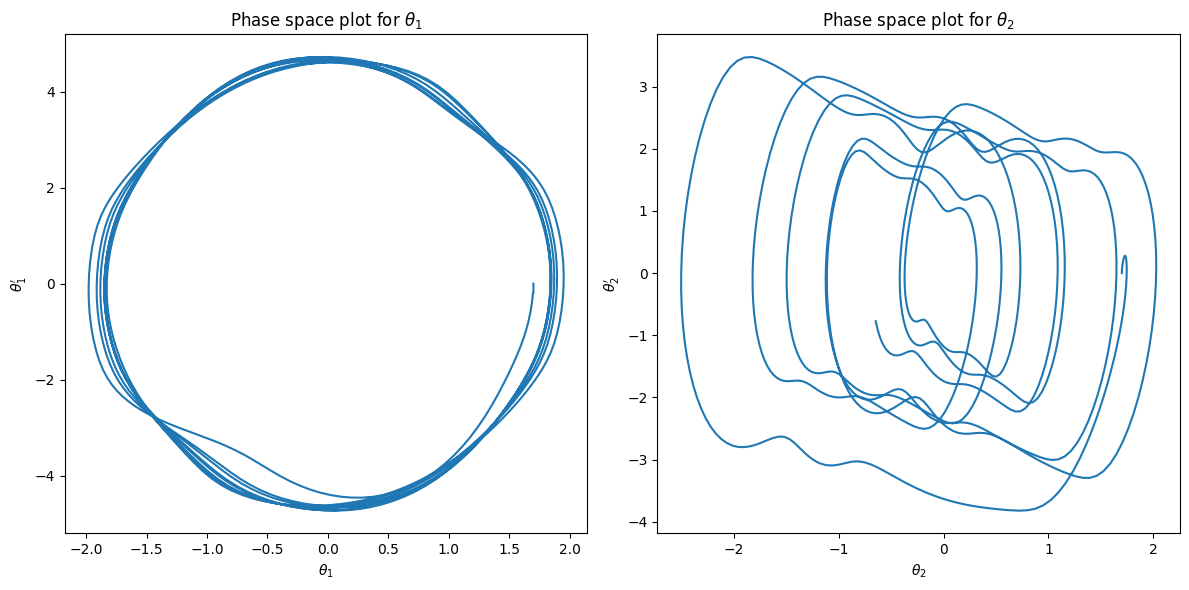

Initial condition:  1.9


<lambdifygenerated-9>:2: RuntimeWarning: overflow encountered in double_scalars
  return (50.0*theta1_dot**2*sin(2*theta1 - 2*theta2) + 100.0*theta2_dot**2*sin(theta1 - theta2) + 1471.5*sin(theta1) + 490.5*sin(theta1 - 2*theta2))/(100.0*cos(theta1 - theta2)**2 - 200.0)
<lambdifygenerated-10>:2: RuntimeWarning: overflow encountered in double_scalars
  return (-100.0*theta1_dot**2*sin(theta1 - theta2) - 25.0*theta2_dot**2*sin(2*theta1 - 2*theta2) + 490.5*sin(theta2) - 490.5*sin(2*theta1 - theta2))/(50.0*cos(theta1 - theta2)**2 - 100.0)
<lambdifygenerated-9>:2: RuntimeWarning: invalid value encountered in double_scalars
  return (50.0*theta1_dot**2*sin(2*theta1 - 2*theta2) + 100.0*theta2_dot**2*sin(theta1 - theta2) + 1471.5*sin(theta1) + 490.5*sin(theta1 - 2*theta2))/(100.0*cos(theta1 - theta2)**2 - 200.0)
<lambdifygenerated-9>:2: RuntimeWarning: invalid value encountered in sin
  return (50.0*theta1_dot**2*sin(2*theta1 - 2*theta2) + 100.0*theta2_dot**2*sin(theta1 - theta2) + 1471.5*sin(t

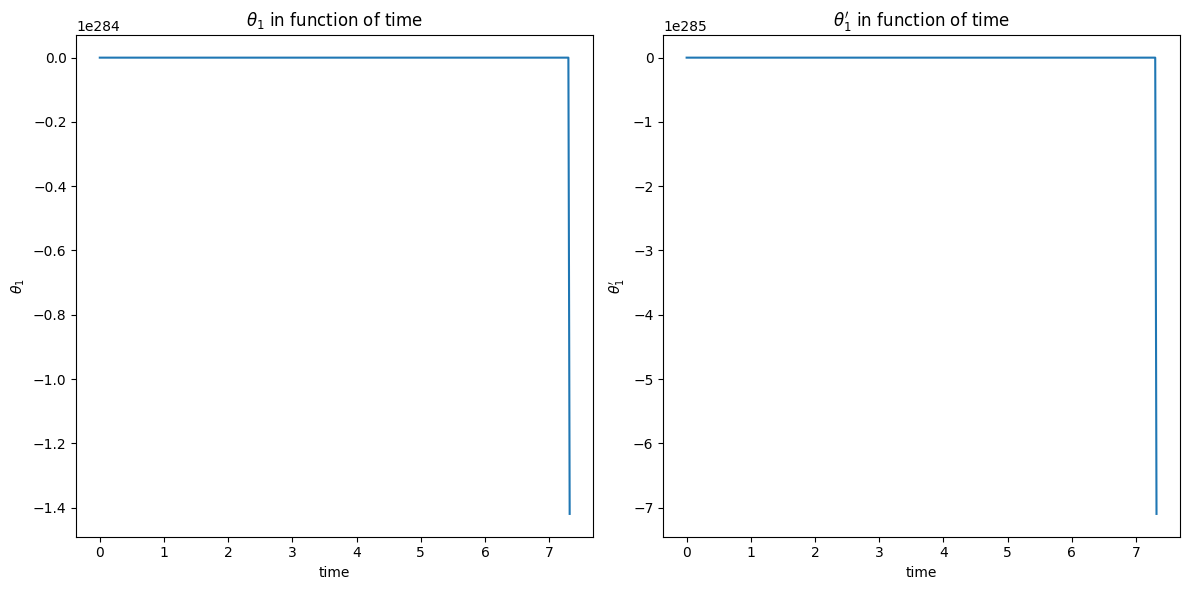

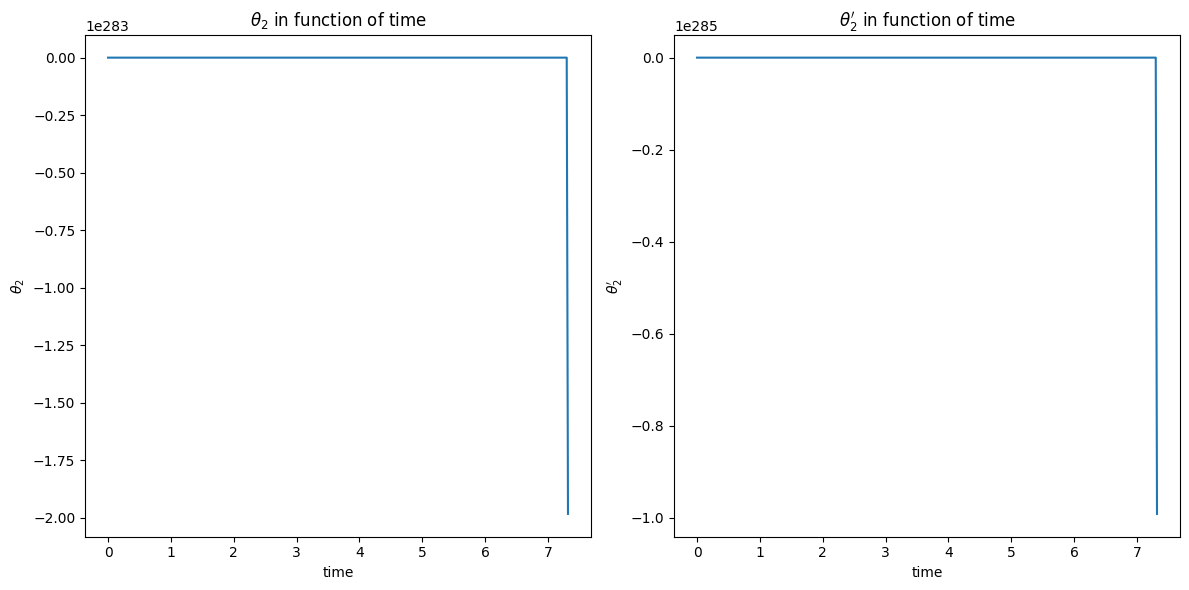

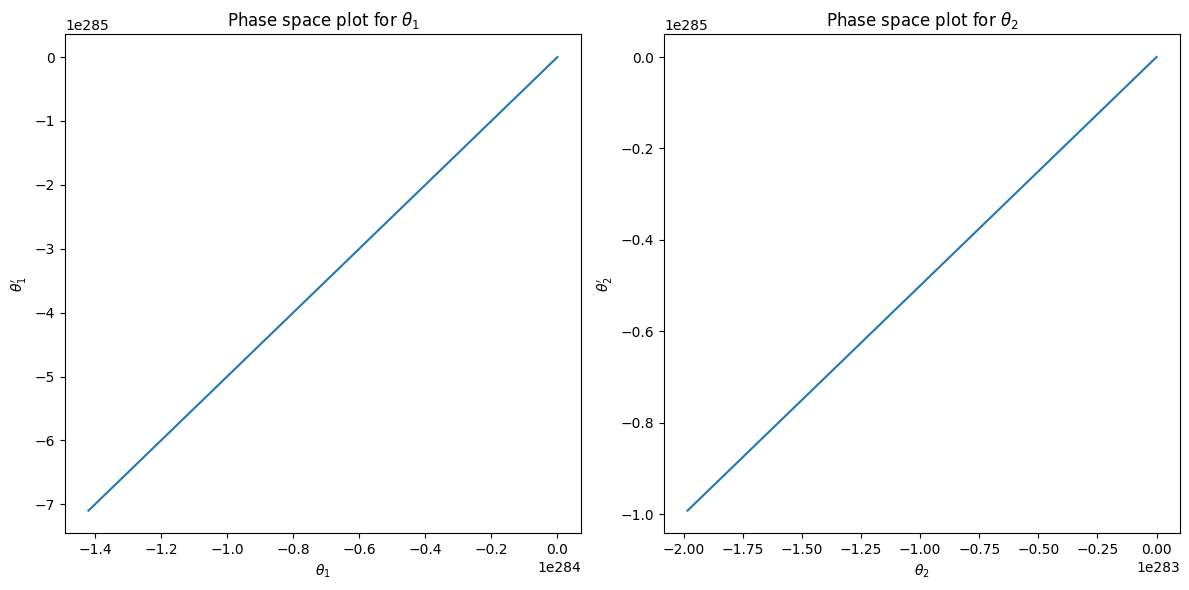

Initial condition:  2


<lambdifygenerated-9>:2: RuntimeWarning: overflow encountered in double_scalars
  return (50.0*theta1_dot**2*sin(2*theta1 - 2*theta2) + 100.0*theta2_dot**2*sin(theta1 - theta2) + 1471.5*sin(theta1) + 490.5*sin(theta1 - 2*theta2))/(100.0*cos(theta1 - theta2)**2 - 200.0)
<lambdifygenerated-10>:2: RuntimeWarning: overflow encountered in double_scalars
  return (-100.0*theta1_dot**2*sin(theta1 - theta2) - 25.0*theta2_dot**2*sin(2*theta1 - 2*theta2) + 490.5*sin(theta2) - 490.5*sin(2*theta1 - theta2))/(50.0*cos(theta1 - theta2)**2 - 100.0)
<lambdifygenerated-9>:2: RuntimeWarning: invalid value encountered in double_scalars
  return (50.0*theta1_dot**2*sin(2*theta1 - 2*theta2) + 100.0*theta2_dot**2*sin(theta1 - theta2) + 1471.5*sin(theta1) + 490.5*sin(theta1 - 2*theta2))/(100.0*cos(theta1 - theta2)**2 - 200.0)
<lambdifygenerated-9>:2: RuntimeWarning: invalid value encountered in sin
  return (50.0*theta1_dot**2*sin(2*theta1 - 2*theta2) + 100.0*theta2_dot**2*sin(theta1 - theta2) + 1471.5*sin(t

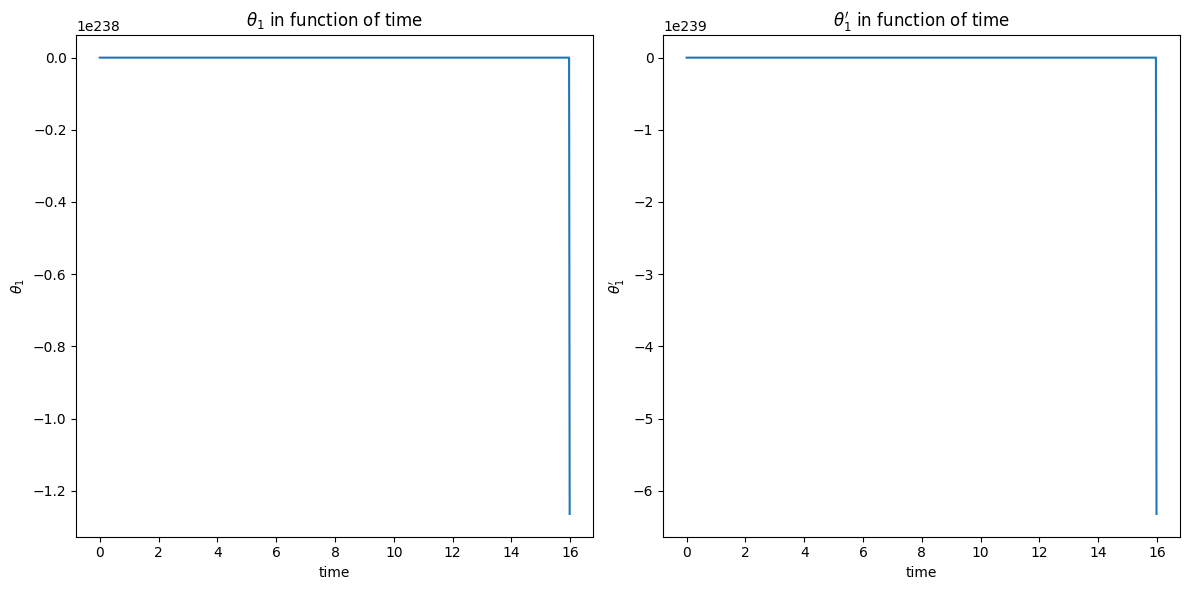

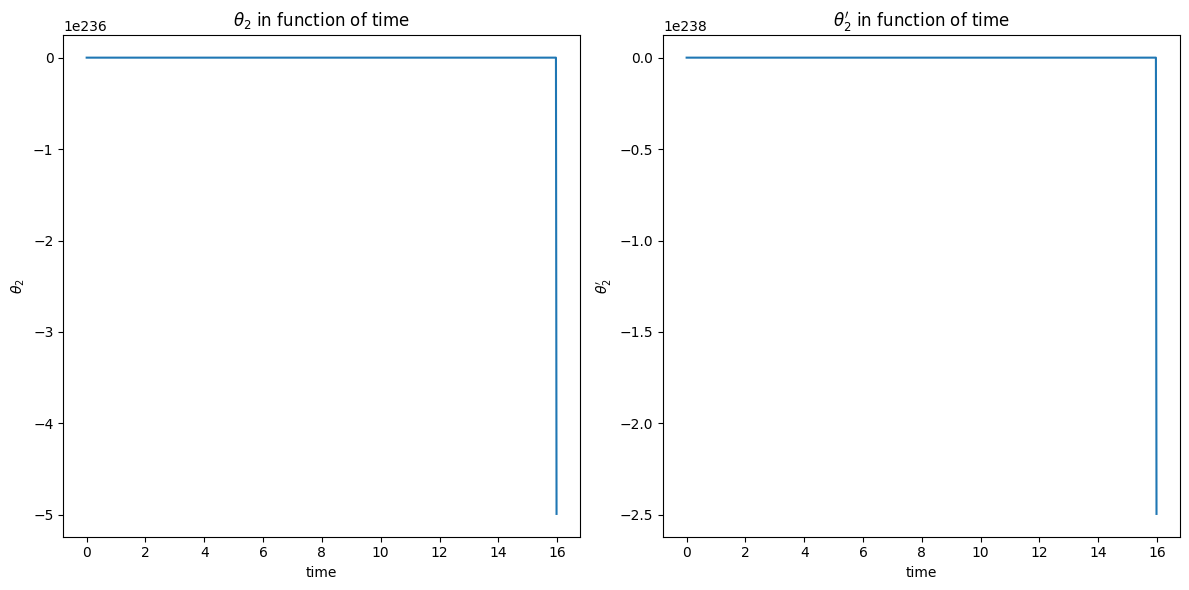

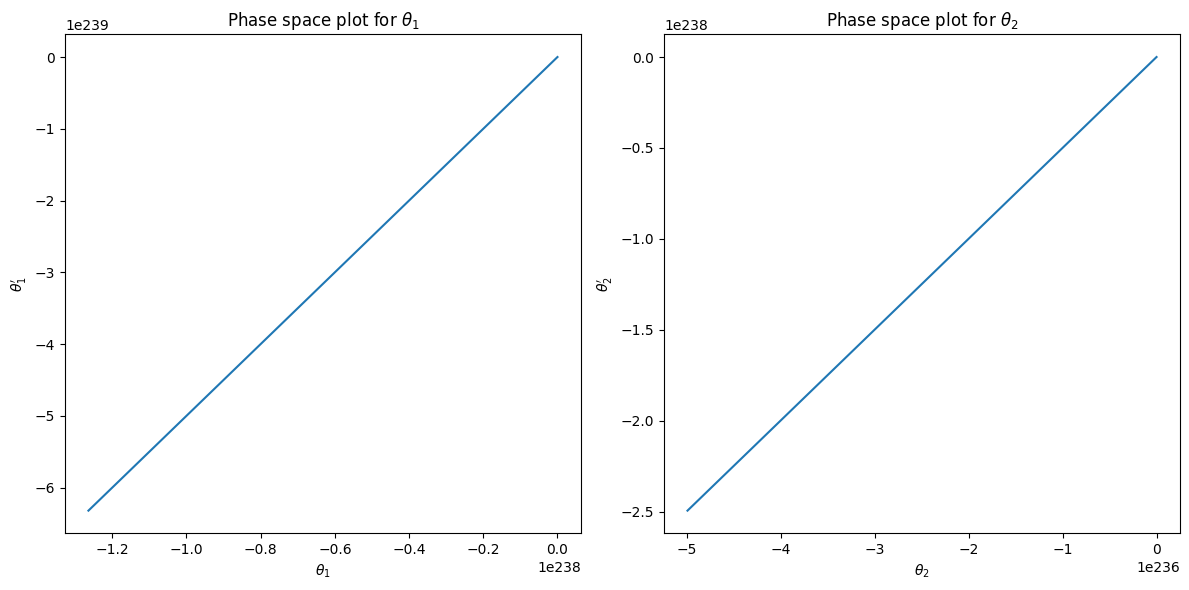

In [62]:
alpha = [1e-9, 1e-7, 0.005, 0.05, 1, 1.2, 1.5, 1.7, 1.9, 2]
for a in alpha:
    print("Initial condition: ", a)
    y0 = np.array([a, a, 0, 0])
    Y = verlet(y0, h, l1, l2, m1, m2, N, g)
    graph_function_time(Y, t)
    PhaseSpacePlot(Y)